In [2]:
from random import getrandbits, randint, random
from collections import namedtuple
from matplotlib import pyplot as plt

In [3]:
def individual(n_de_itens):
    return [getrandbits(1) for x in range(n_de_itens)]


def population(n_de_individuos, n_de_itens):
    return [individual(n_de_itens) for x in range(n_de_individuos)]


def fitness(individuo, valor_max, risco, fundos):
    valor_total, risco_total, cont = 0, 0, 0
    for indice, valor in enumerate(individuo):
        valor_total += (individuo[indice] * fundos[indice][1])
        risco_total += (individuo[indice] * fundos[indice][2])
        cont += 1

    if (valor_max - valor_total) < 0:
        return -1
    if (risco_total / cont) > risco:
        return -1
    return valor_total


def media_fitness(populacao, valor_max, risco,
                  fundos):

    summed = sum(fitness(x, valor_max, risco, fundos) for x in populacao if fitness(x, valor_max, risco, fundos) >= 0)
    return summed / (len(populacao) * 1.0)


def selecao_roleta(pais):


    def sortear(fitness_total, indice_a_ignorar=-1):

        roleta, acumulado, valor_sorteado = [], 0, random()

        if indice_a_ignorar != -1:
            fitness_total -= valores[0][indice_a_ignorar]

        for indice, i in enumerate(valores[0]):
            if indice_a_ignorar == indice:
                continue
            acumulado += i
            roleta.append(acumulado / fitness_total)
            if roleta[-1] >= valor_sorteado:
                return indice

    valores = list(zip(*pais))
    fitness_total = sum(valores[0])

    indice_pai = sortear(fitness_total)
    indice_mae = sortear(fitness_total, indice_pai)

    pai = valores[1][indice_pai]
    mae = valores[1][indice_mae]

    return pai, mae


def evolve(populacao, valor_max, risco, fundos, n_de_cromossomos, mutate=0.05):

    pais = [[fitness(x, valor_max, risco, fundos), x] for x in populacao if fitness(x, valor_max, risco, fundos) >= 0]
    pais.sort(reverse=True)

    filhos = []
    while len(filhos) < n_de_cromossomos:
        homem, mulher = selecao_roleta(pais)
        meio = len(homem) // 2
        filho = homem[:meio] + mulher[meio:]
        filhos.append(filho)

    for individuo in filhos:
        if mutate > random():
            pos_to_mutate = randint(0, len(individuo) - 1)
            if individuo[pos_to_mutate] == 1:
                individuo[pos_to_mutate] = 0
            else:
                individuo[pos_to_mutate] = 1

    return filhos

Geração:  0  | Média de valor na carteira:  15833.33
Geração:  1  | Média de valor na carteira:  26104.0
Geração:  2  | Média de valor na carteira:  29632.0
Geração:  3  | Média de valor na carteira:  30931.33
Geração:  4  | Média de valor na carteira:  32597.33
Geração:  5  | Média de valor na carteira:  35759.33
Geração:  6  | Média de valor na carteira:  37317.33
Geração:  7  | Média de valor na carteira:  38590.67
Geração:  8  | Média de valor na carteira:  41412.67
Geração:  9  | Média de valor na carteira:  41712.0
Geração:  10  | Média de valor na carteira:  41999.33
Geração:  11  | Média de valor na carteira:  42558.0
Geração:  12  | Média de valor na carteira:  42286.0
Geração:  13  | Média de valor na carteira:  42402.67
Geração:  14  | Média de valor na carteira:  43496.67
Geração:  15  | Média de valor na carteira:  43280.0
Geração:  16  | Média de valor na carteira:  43858.67
Geração:  17  | Média de valor na carteira:  44998.0
Geração:  18  | Média de valor na carteira:  

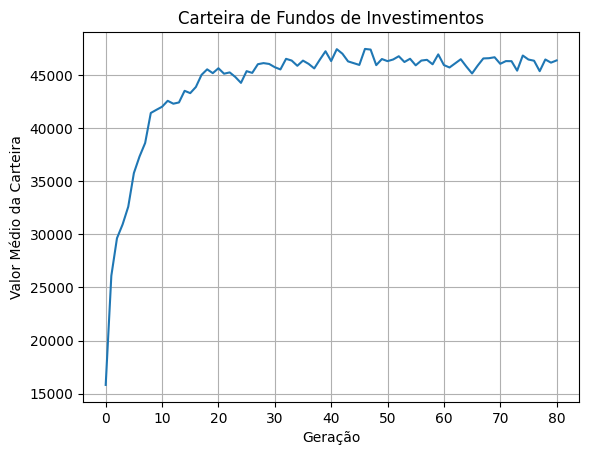

In [4]:
Fundo = namedtuple('Fundo', ['nome', 'valor_minimo', 'risco'])

fundos = [
    Fundo('Selection Multimercado Plus FIC FIM', 100, 26),
    Fundo('Bahia AM Maraú Advisory FIC de FIM', 5000, 8),
    Fundo('Moat Capital Equity Hedge FIC FIM', 1000, 8),
    Fundo('Kiron FIC FIA', 10000, 36),
    Fundo('XP Macro Institucional FIC FIM', 5000, 6),
    Fundo('Giant Darius FIC FIM', 500, 26),
    Fundo('Selection RF High Yield FIC FIM CP Longo Prazo', 100, 8),
    Fundo('Augme 45 Advisory FIC FIRF CP', 500, 6),
    Fundo('XP Corporate Plus FIC FIM CP', 10000, 26),
    Fundo('Tavola Absoluto Advisory FIC FIM', 500, 26),
    Fundo('XP Debentures Incentivadas Crédito', 5000, 10),
    Fundo('JGP Corporate FIC FIRF CP LP - Feeder III', 20000, 6),
    Fundo('Tork Long Only Insititucional FIC FIA', 5000, 37),
    Fundo('Navi Cruise Advisory FIC FIA', 5000, 33),
    Fundo('Absolute Alpha Global Advisory Global Advisory FIC FIM', 500, 8),
    Fundo('Kapitalo Kappa Advisory FIC FIM', 10000, 10),
    Fundo('Kinea Chronos FIM', 5000, 6),
    Fundo('Absolute Pace Lond Biased Advisory FIC FIA', 500, 28),
    Fundo('Gap Absoluto FIC FIM', 500, 15),
    Fundo('Vinci Seleção FIA', 500, 33),
]
risco = 10
valor_max = 50000
n_de_cromossomos = 150
geracoes = 80
n_de_itens = len(fundos)

populacao = population(n_de_cromossomos, n_de_itens)
historico_de_fitness = [media_fitness(populacao, valor_max, risco, fundos)]
for i in range(geracoes):
    populacao = evolve(populacao, valor_max, risco, fundos, n_de_cromossomos)
    historico_de_fitness.append(media_fitness(populacao, valor_max, risco, fundos))


for indice, valor_med in enumerate(historico_de_fitness):
    print("Geração: ", indice, " | Média de valor na carteira: ", round(valor_med,2))

print("\nValor máximo:", valor_max, "\n\nItens disponíveis:")
for indice, i in enumerate(fundos):
    print("Item ", indice + 1, ": ", i[0], " |Investimento mínimo R$", i[1], " | Risco:", i[2])

print("\nExemplos de boas soluções: ")
for i in range(5):
    print(populacao[i])


plt.plot(range(len(historico_de_fitness)), historico_de_fitness)
plt.grid(True, zorder=0)
plt.title("Carteira de Fundos de Investimentos")
plt.xlabel("Geração")
plt.ylabel("Valor Médio da Carteira")
plt.show()
